# **Customer Churn Analysis and Prediction of IBM Telco dataset**

## Introduction

**Customer Churn:** When customers leave a service or company over a period of time.

**Project Overview:** 
Customer churn is a critical problem for many businesses as it directly impacts revenue and growth. This project focuses on analyzing customer data from a fictional telecommunications company to identify patterns and factors contributing to churn. The dataset consists of customer demographics, account information, and service usage. By building a predictive model, I aim to forecast future churn and provide actionable insights that businesses can use to develop effective customer retention strategies.

**Objectives:**
1. **Data Collection and Cleaning:** Load and preprocess the [IBM Watson Telco Customer Churn dataset](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).
2. **Exploratory Data Analysis (EDA):** Perform EDA to identify key factors influencing churn.
3. **Model Building:** Develop a predictive model.
4. **Model Evaluation:** Evaluate model performance using appropriate metrics.
5. **Data Visualization and Reporting:** Visualize key findings and model predictions using data visualization tools.
6. **Reccomendations:** Provide actionable insights based on findings.

## Data Collection and Cleaning

In this step of the project, we will be loading in our dataset and performing data cleansing to refine the dataset we're working with.

In [25]:
# Loading in data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\brenn\Documents\Career\Customer Churn Project\Telco_customer_churn.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [26]:
# Checking Data Types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [27]:
# Converting 'Total Charges' from object to float64 datatype.
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [28]:
# The conversion produced 11 rows with NaNs.
print(df['Total Charges'].isnull().sum())

11


In [29]:
# Filling the NaN values with the mean.
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].mean())
print(df['Total Charges'].isnull().sum())

0


In [30]:
# Checking for duplicates
print(df.duplicated().sum())

0


In [31]:
# Identifying missing values
# There are 5,174 existing customers who have not left, which explains why there are 5,174 missing values for the Churn Reason.
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [32]:
#Removing uncessessary columns
df = df.drop(columns=['Lat Long', 'Longitude', 'Country', 'Latitude','Churn Label','Churn Score'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

In [33]:
# Removing extra space before and after text in the columns
df.columns = df.columns.str.strip()

In [34]:
# Converting object types to category
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

## Exploratory Data Analysis

In this section of the project, we will be peforming a variety of analytical processes to familiarize ourself with the data and identify key factors influencing churn in the dataset.

In [37]:
#Summary statistics
print(df.describe())
print(df['Gender'].value_counts())
print(df['Senior Citizen'].value_counts())
print(df['Partner'].value_counts())
print(df['Contract'].value_counts())

        Count      Zip Code  Tenure Months  Monthly Charges  Total Charges  \
count  7043.0   7043.000000    7043.000000      7043.000000    7043.000000   
mean      1.0  93521.964646      32.371149        64.761692    2283.300441   
std       0.0   1865.794555      24.559481        30.090047    2265.000258   
min       1.0  90001.000000       0.000000        18.250000      18.800000   
25%       1.0  92102.000000       9.000000        35.500000     402.225000   
50%       1.0  93552.000000      29.000000        70.350000    1400.550000   
75%       1.0  95351.000000      55.000000        89.850000    3786.600000   
max       1.0  96161.000000      72.000000       118.750000    8684.800000   

       Churn Value         CLTV  
count  7043.000000  7043.000000  
mean      0.265370  4400.295755  
std       0.441561  1183.057152  
min       0.000000  2003.000000  
25%       0.000000  3469.000000  
50%       0.000000  4527.000000  
75%       1.000000  5380.500000  
max       1.000000  6500.

In [38]:
# Number of unique values
df.nunique()

CustomerID           7043
Count                   1
State                   1
City                 1129
Zip Code             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
CLTV                 3438
Churn Reason           20
dtype: int64

In [39]:
#A Churn Value of 1 indicates the customer has left. 1869 Customers in the dataset have churned.
df["Churn Value"].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [121]:
#The most frequent reason for churn was attitude of support person followed by competitor offerings based on customer provided information.
df["Churn Reason"].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

#### **Feature:** Variable used or selected for prediction purposes. This measurable property or characteristic help models learn patterns and make predictions about the data.

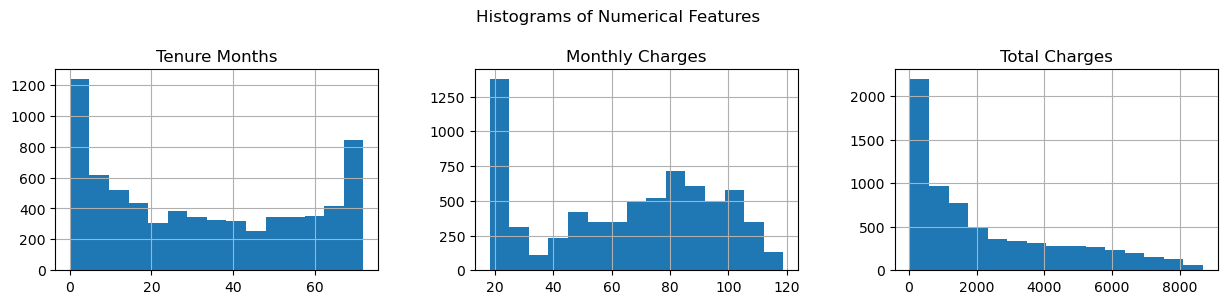

In [41]:
# Histogram for selected numerical features
num_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [143]:
#Charting numerical features in order to determine features strongly correlated with customer churn.
df.corr(numeric_only = True)

,Count,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.001041,-0.004596,-0.001461,0.003346,-0.003562
Tenure Months,NaN,0.001041,1.000000,0.247900,0.824757,-0.352229,0.396406
Monthly Charges,NaN,-0.004596,0.247900,1.000000,0.650468,0.193356,0.098693
Total Charges,NaN,-0.001461,0.824757,0.650468,1.000000,-0.199428,0.341384
Churn Value,NaN,0.003346,-0.352229,0.193356,-0.199428,1.000000,-0.127463
CLTV,NaN,-0.003562,0.396406,0.098693,0.341384,-0.127463,1.000000


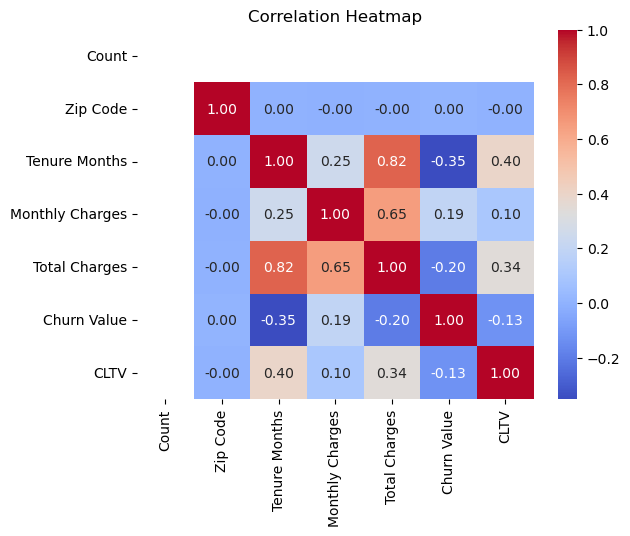

In [43]:
#Based on the correlation map, we will investigate further into Customer Tenure, Monthly Charges, and Total Charges.
numeric_columns = df.select_dtypes(include=['float','integer'])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.rcParams['figure.figsize'] = (20, 7)
plt.title('Correlation Heatmap')
plt.show()

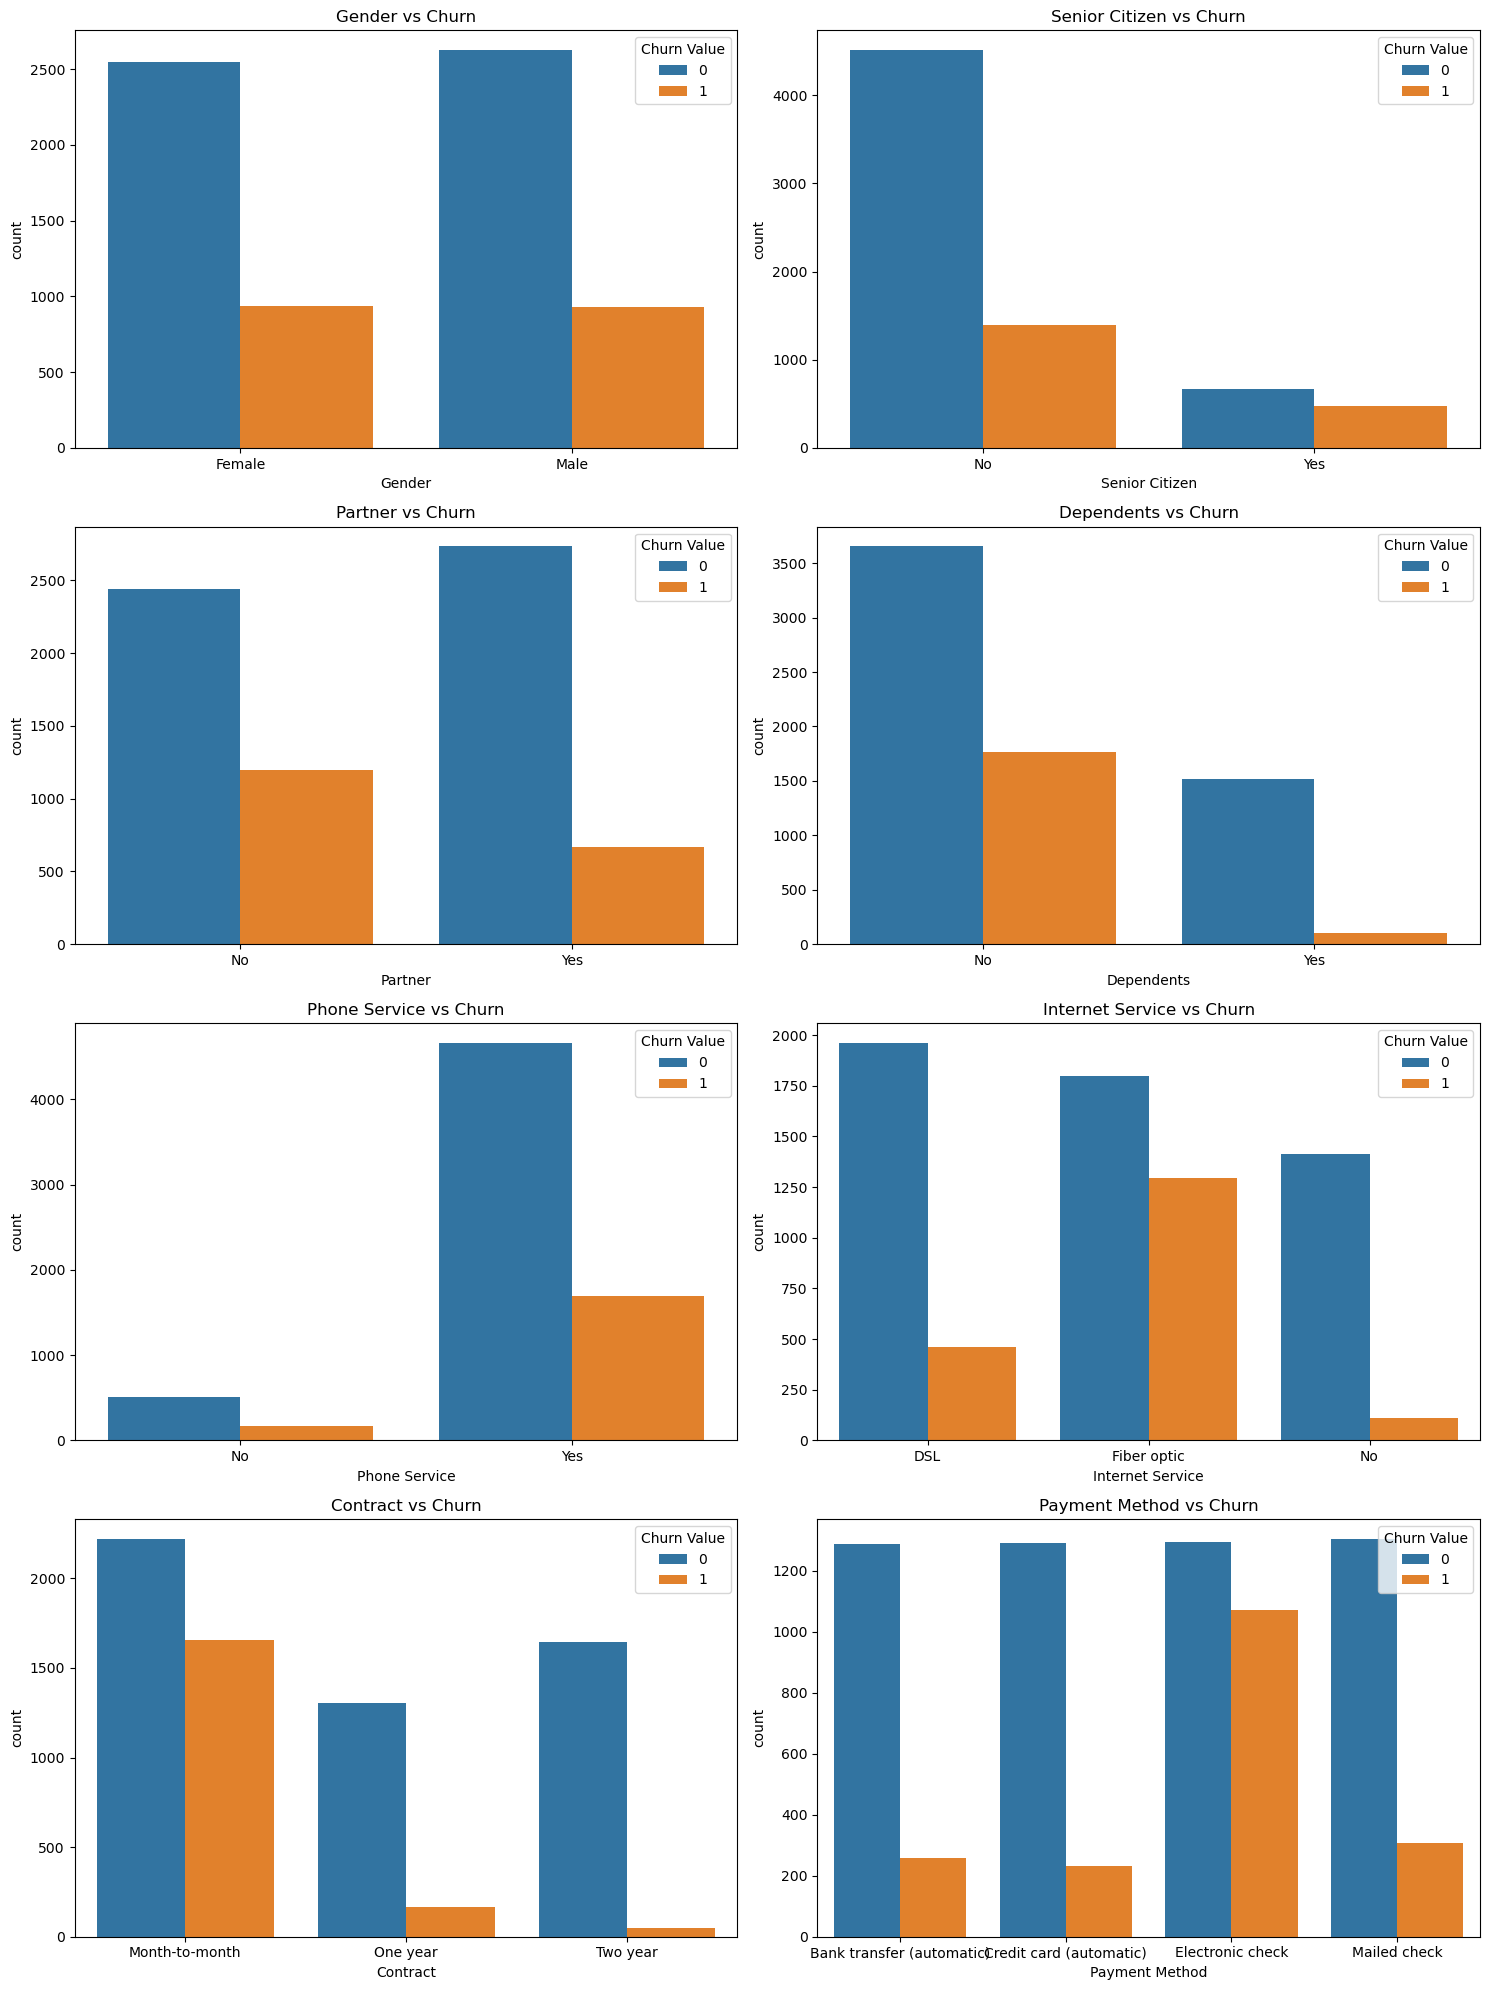

In [44]:
#Bar Plots of categorical features vs churn.
cat_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Internet Service', 'Contract', 'Payment Method']
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for idx, feature in enumerate(cat_features):
    row, col = idx // 2, idx % 2
    sns.countplot(x=feature, hue='Churn Value', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Churn')
plt.tight_layout()
plt.show()

In [45]:
#converted Tenure Months to bins to ease analysis and for better visualization
bins = list(range(0, df['Tenure Months'].max() + 6, 6))
labels = [f'{i}-{i+5}' for i in bins[:-1]]

In [46]:
# Create a new column for grouping of customers based on tenure
df['tenure_group'] = pd.cut(df['Tenure Months'], bins=bins, labels=labels, right=False)

In [47]:
# Check change
print(df[['Tenure Months', 'tenure_group']].head())

   Tenure Months tenure_group
0              2          0-5
1              2          0-5
2              8         6-11
3             28        24-29
4             49        48-53


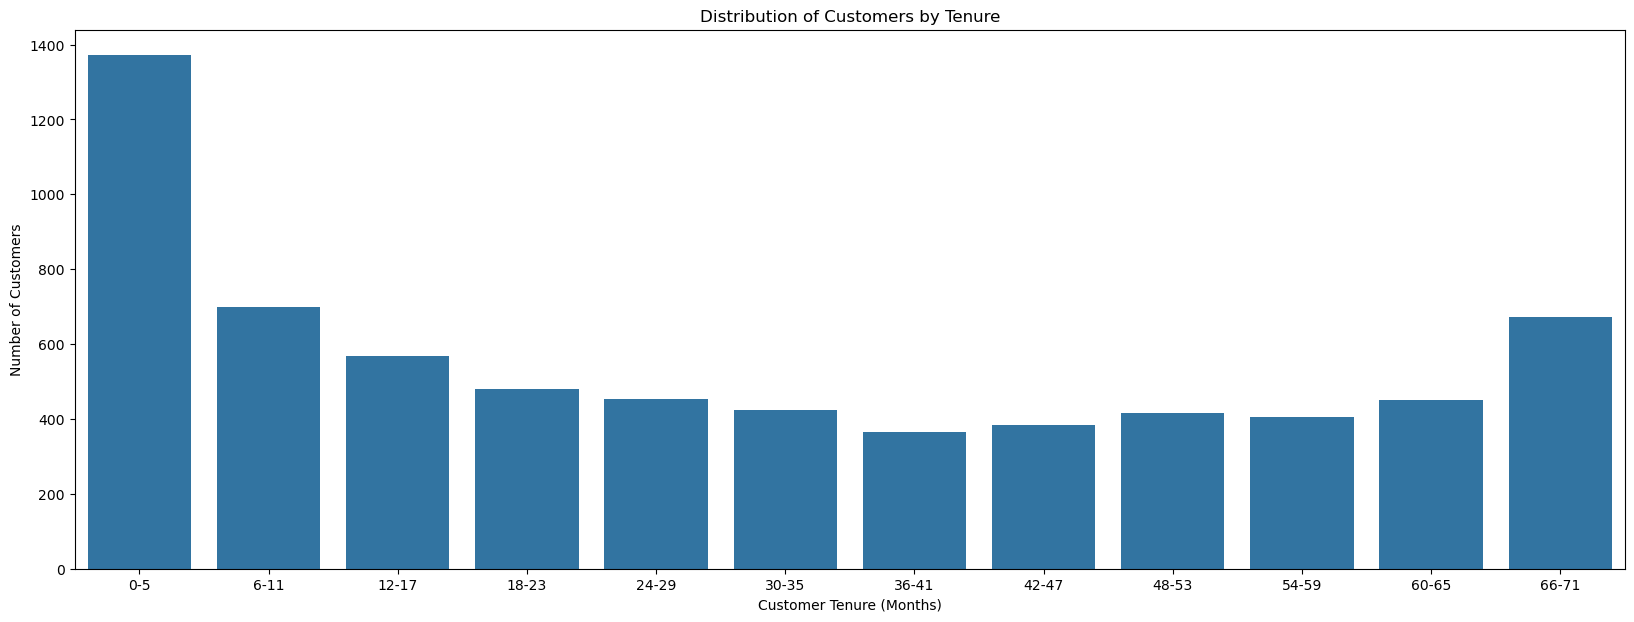

In [48]:
# Graph of distribution of customers based on tenure
plt.figure(figsize=(20, 7))
sns.countplot(x='tenure_group', data=df, order=labels)
plt.title('Distribution of Customers by Tenure')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

In [49]:
#Cross table of customer tenure groups and churn
ct_customer_tenure = pd.crosstab(df['tenure_group'], df['Churn Value'])
print(ct_customer_tenure)

Churn Value     0    1
tenure_group          
0-5           627  744
6-11          443  255
12-17         377  191
18-23         361  118
24-29         352  101
30-35         331   92
36-41         285   79
42-47         317   67
48-53         352   64
54-59         345   59
60-65         414   36
66-71         614   57


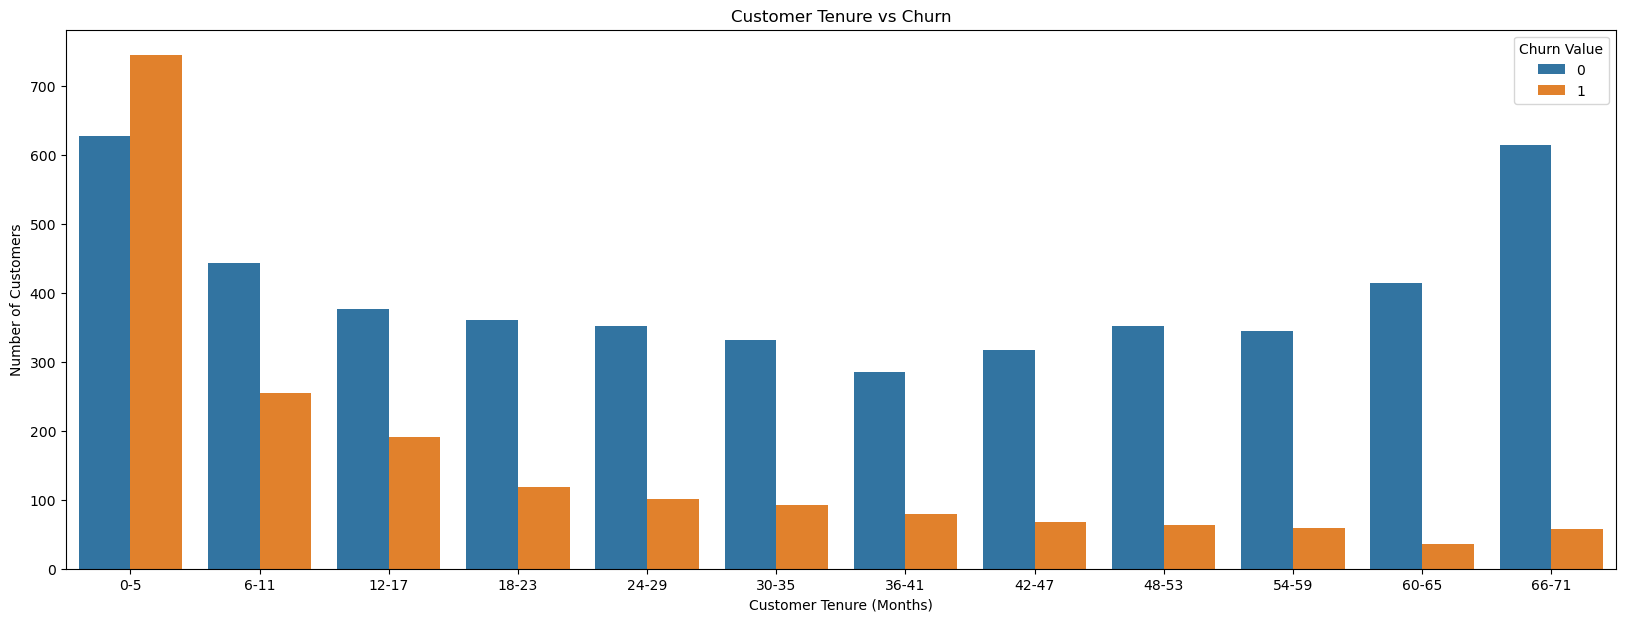

In [50]:
# Bar plot for Customer Tenure and Churn
sns.countplot(x='tenure_group', hue='Churn Value', data=df)
plt.title('Customer Tenure vs Churn')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()


In [145]:
#Defining variables to convert monthly charges into bins.
bin_edges = [0, 30, 60, 90, 120]
bin_labels = ['$0-$30','$30-$60','$60-$90','$90-$120']

In [153]:
df['monthly_charges_group'] = pd.cut(df['Monthly Charges'], bins=bin_edges, labels=bin_labels, include_lowest=True)

#Check change
print(df[['Monthly Charges', 'monthly_charges_group']].head())

   Monthly Charges monthly_charges_group
0            53.85               $30-$60
1            70.70               $60-$90
2            99.65              $90-$120
3           104.80              $90-$120
4           103.70              $90-$120


In [149]:
#Cross table of customer tenure groups and churn
ct_monthly_charges = pd.crosstab(df['monthly_charges_group'], df['Churn Value'])
print(ct_monthly_charges)

Churn Value               0    1
monthly_charges_group           
$0-$30                 1491  162
$30-$60                 937  328
$60-$90                1577  809
$90-$120               1169  570


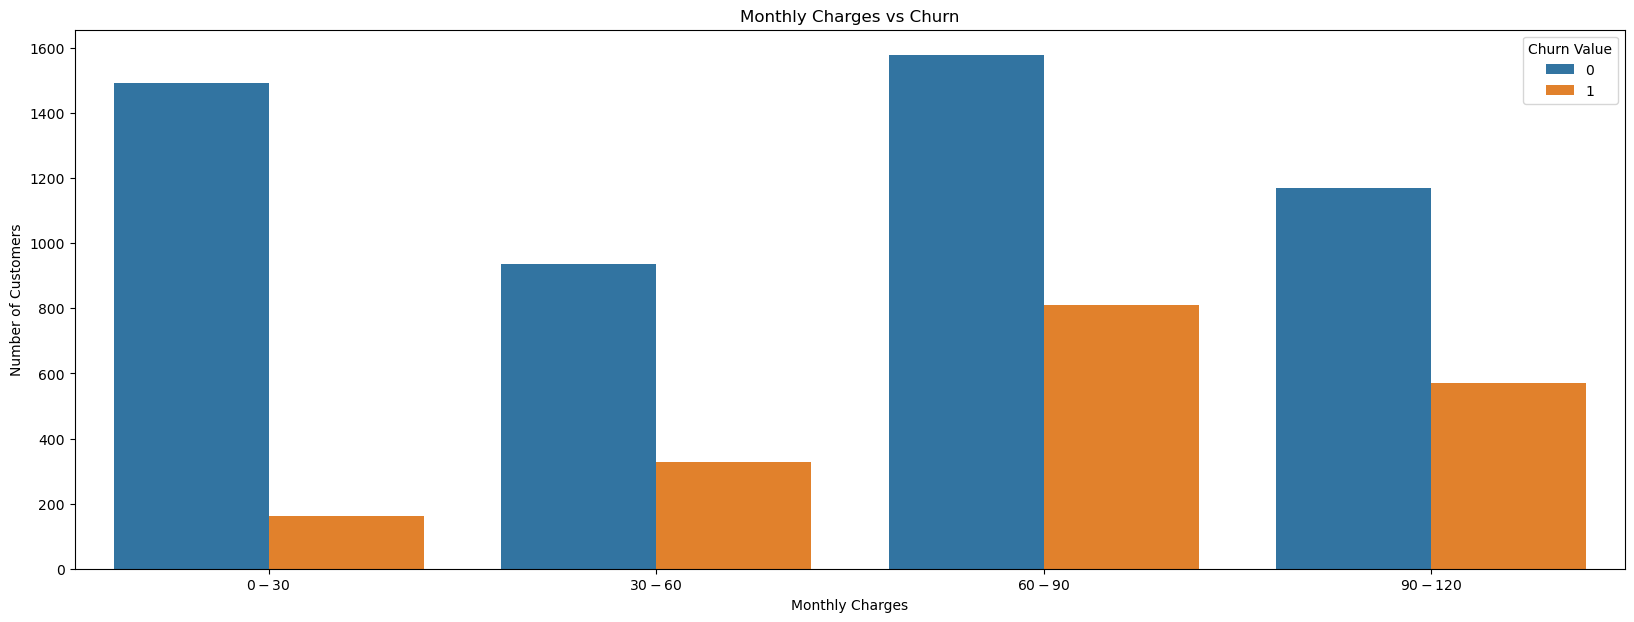

In [155]:
#Bar plot for Monthly Charges and Churn
sns.countplot(x='monthly_charges_group', hue='Churn Value', data=df)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

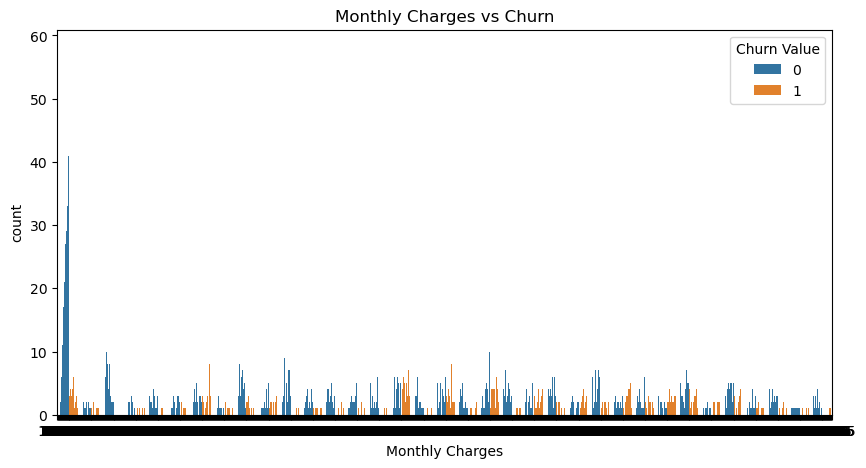

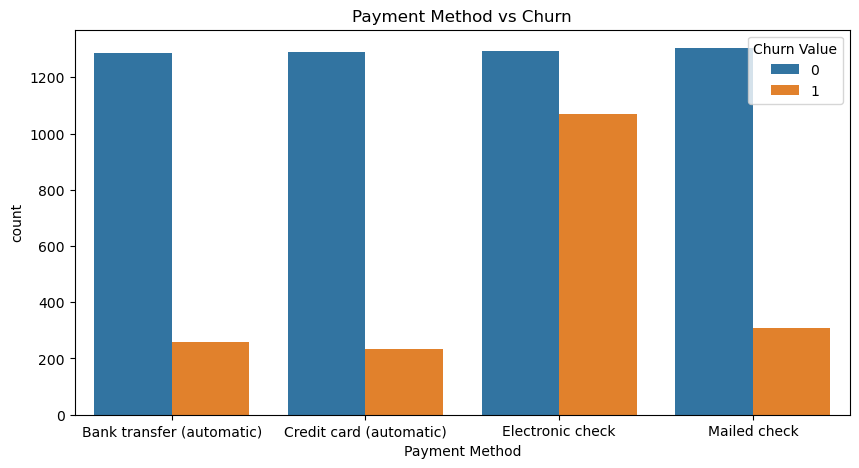

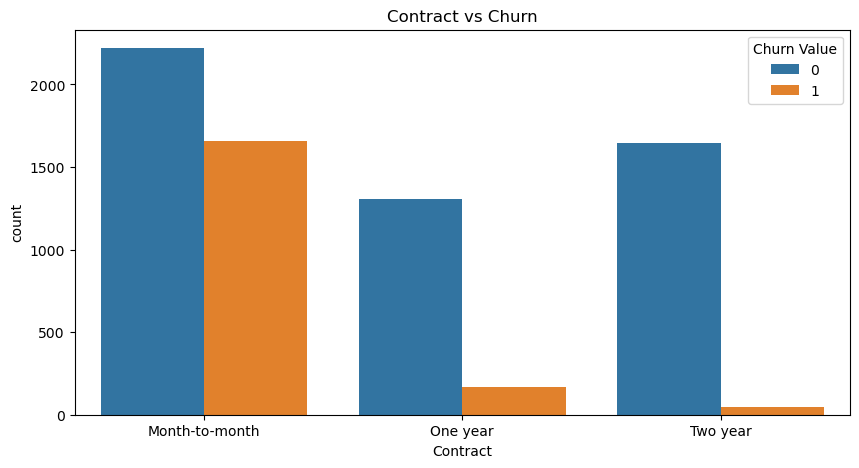

In [51]:
# Plot categorical features against 'Churn'
categorical_features = ['Monthly Charges', 'Payment Method','Contract']

for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='Churn Value', data=df)
    plt.title(f'{column} vs Churn')
    plt.show()

## Model Building - Logistic Regression

**Logistic Regression:** A machine learning algorithm where that classifies an outcome variable into one of two possible values and estimates probability.

**Why Logistic Regression?** Logistic Regression is a great model for binary classification. In this instance, customers can only churn or not churn. Logistic regression also peforms well with a dataset of this size. 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [54]:
# Selecting relevant features to build the model based on
features = ['Monthly Charges', 'Contract', 'Payment Method']
target = 'Churn Value'

In [55]:
#checking for missing variables
dfa = df.dropna(subset=features + [target])

In [56]:
X = dfa[features]
y = dfa[target].astype(int)

In [57]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Preprocessing pipeline
# OneHotEncoder for categorical variables, StandardScaler for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Monthly Charges']),
        ('cat', OneHotEncoder(), ['Contract', 'Payment Method'])
    ])

In [59]:
# Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [60]:
# Training model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Monthly Charges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Contract',
                                                   'Payment Method'])])),
                ('classifier', LogisticRegression())])

In [61]:
# Make predictions
y_pred = model.predict(X_test)

## Model Evaluation

In [63]:
# Evaluating Logistic Regression model using a confusion matrix and classification report.
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7579843860894251
Confusion Matrix:
 [[888 121]
 [220 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      1009
           1       0.60      0.45      0.51       400

    accuracy                           0.76      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.74      0.76      0.75      1409



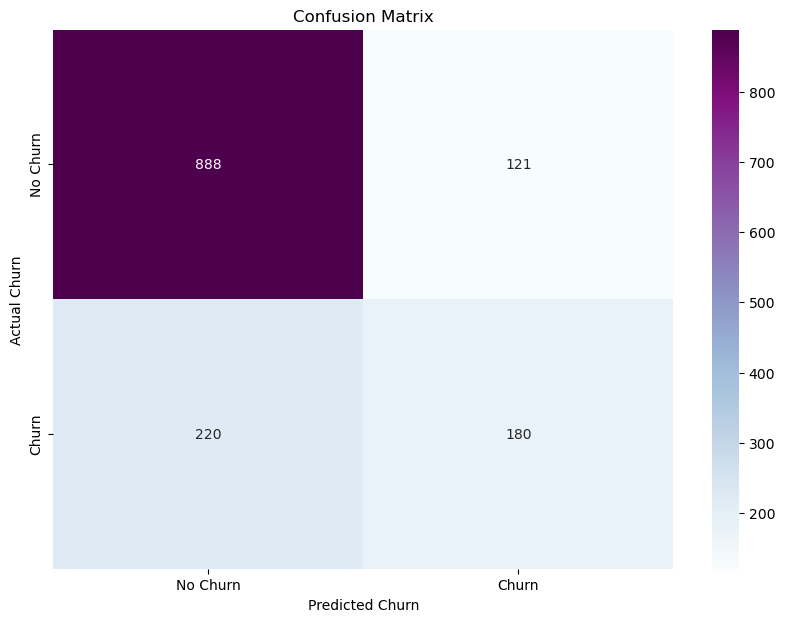

In [64]:
# Function to plot the confusion matrix, 1st method of evaluating the model
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuPu", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Churn")
    plt.ylabel("Actual Churn")
    plt.show()
class_names = ['No Churn', 'Churn']
plot_confusion_matrix(conf_matrix, class_names)

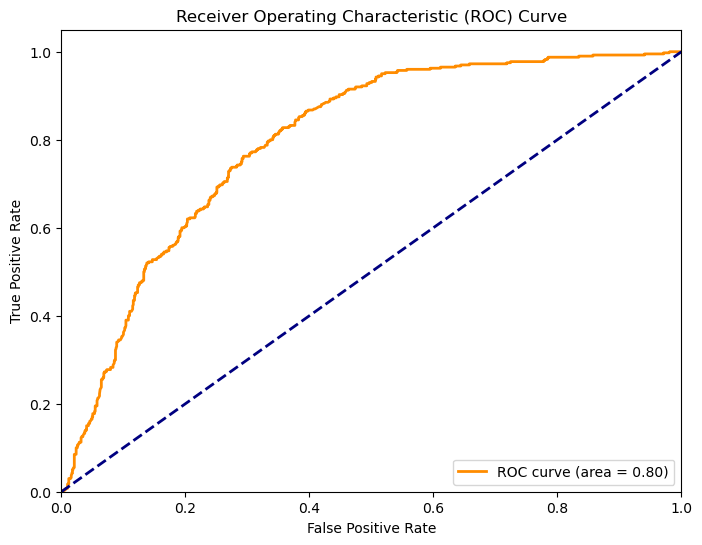

In [65]:
#ROC Curve. 2nd method of model evaluation. The closer the line is to the top left corner and top right corner the more accurate the model
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Recommendations and Insights

**Key Insights**
- Customer Tenure, Monthly Charges, and Payment Method were identified as the main factors influencing customer churn.
- Customers on a month-to-month contract were more likely to leave the service.
- Customers paying higher monthly charges and by electronic check were also more likely to leave the service.
- The Logistic Regression model performed well in identifying customers who will not churn but had moderate performance in identifying customer who will churn.

**Reccomendations**
- Offer targeted promotions to customers on month-to-month contracts to encourage them to sign up for longer-term contracts.
- Consider loyalty discounts/programs for high-paying customers.
- Encourage customers to switch from electronic check payments to more stable methods such as automatic banks transfers or credit card payments.
- Improve the logistic regression model by exploring other features or testing different algorithms to better identify potential churners.